In [1]:
from WF_SDK import device       # import instruments
 
"""-----------------------------------------------------------------------"""
 
# connect to the device


device_data = device.open(device = "Analog Discovery 2") # open the connection

"""-----------------------------------"""
 
# use instruments here
 
 
"""-----------------------------------"""
 
# close the connection
device.close(device_data)

In [3]:
from WF_SDK import device, scope, wavegen   # import instruments

scope.data.sampling_frequency
scope.data.buffer_size

20000000.0

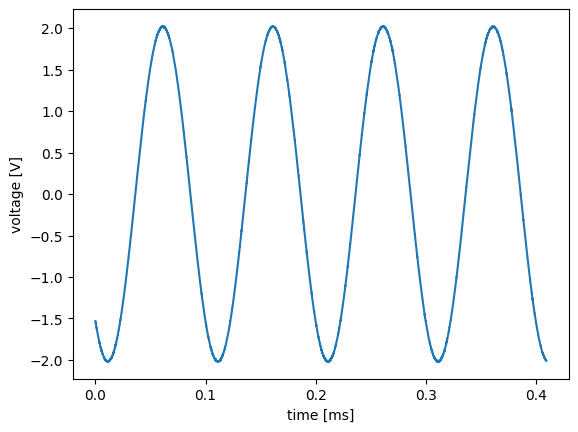

In [4]:
from WF_SDK import device, scope, wavegen   # import instruments
 
import matplotlib.pyplot as plt   # needed for plotting
 
"""-----------------------------------------------------------------------"""
 
# connect to the device
device_data = device.open(device = "Analog Discovery 2") # open the connection
 
"""-----------------------------------"""
 
# initialize the scope with default settings
scope.open(device_data)
 
# generate a 10KHz sine signal with 2V amplitude on channel 1
wavegen.generate(device_data, channel=1, function=wavegen.function.sine, offset=0, frequency=10e03, amplitude=2)
 
# record data with the scopeon channel 1
buffer= scope.record(device_data, channel=1)
time = range(0, scope.data.buffer_size)

time = [moment / scope.data.sampling_frequency for moment in time]
time = [moment * 1e03 for moment in time]
 
# print(buffer)
# print(type(buffer))
 
# plot
#time = [moment * 1e03 for moment in time]   # convert time to ms
plt.plot(time, buffer)
plt.xlabel("time [ms]")
plt.ylabel("voltage [V]")
plt.show()
 
# reset the scope
scope.close(device_data)
 
# reset the wavegen
wavegen.close(device_data)
 
"""-----------------------------------"""
 
# close the connection
device.close(device_data)